In [409]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [410]:
loan=pd.read_csv("loan.csv",header=0)

C:\Users\tpaul\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [411]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [412]:
loan.shape

(39717, 111)

In [413]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [414]:
loan.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


In [415]:
loan1=loan[~loan.isnull()]  # null value check
loan1

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [416]:
loan.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

######  **Cleaning data**: deleting the column those have more than 50% of 'NaN'

In [417]:
loan1= loan[[column for column in loan if (loan[column].isnull().sum())/(len(loan)) <=0.5]]
loan1.shape

(39717, 54)

In [418]:
del loan1['id'] # no use in the EDA
loan1.shape

(39717, 53)

In [419]:
loan1.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [420]:
col_list=list(loan1.columns) # Existing columns after the NaN deleting. 

In [421]:
loan1

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,FiSite Research,...,80.90,Jun-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39713,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,"Squarewave Solutions, Ltd.",...,281.94,Jul-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39714,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,NaN,...,0.00,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39715,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,NaN,...,0.00,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN


In [422]:
loan1.int_rate.head()

0    10.65%
1    15.27%
2    15.96%
3    13.49%
4    12.69%
Name: int_rate, dtype: object

In [423]:
loan1.int_rate=loan1.int_rate.apply(lambda x: x.replace('%', ''))  #remove the '%'
#loan1.int_rate=loan1.emp_length.apply(lambda x: x.replace('+', ''))  #remove the '+'

C:\Users\tpaul\Anaconda3\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [424]:
loan1.emp_length.isnull().sum()

1075

In [425]:
loan1.emp_length.median()

TypeError: could not convert string to float: '10+ years'

In [426]:
loan1['emp_length'].fillna('loan1.emp_length.median()', inplace= True)  #filling the missing values

C:\Users\tpaul\Anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [427]:
loan1.emp_length.isnull().sum()  # null value checking

0

In [406]:
loan1.emp_length=loan1.emp_length

C:\Users\tpaul\Anaconda3\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [428]:
loan1.emp_length=loan1.emp_length.str.extract('(\d+)')     #extract the decimal digits only

In [429]:
loan1.emp_length

0        10
1         1
2        10
3        10
4         1
         ..
39712     4
39713     3
39714     1
39715     1
39716     1
Name: emp_length, Length: 39717, dtype: object

In [430]:
loan1.emp_length=loan1.emp_length.apply(lambda x: float(x)) #object to float conversion

In [431]:
loan1.emp_length.head()

0    10.0
1     1.0
2    10.0
3    10.0
4     1.0
Name: emp_length, dtype: float64

In [432]:
loan1.int_rate.apply(lambda x: float(x))  #object to float 

0        10.65
1        15.27
2        15.96
3        13.49
4        12.69
         ...  
39712     8.07
39713    10.28
39714     8.07
39715     7.43
39716    13.75
Name: int_rate, Length: 39717, dtype: float64

In [433]:
loan1.emp_length.value_counts()

1.0     8898
10.0    8879
2.0     4388
3.0     4095
4.0     3436
5.0     3282
6.0     2229
7.0     1773
8.0     1479
9.0     1258
Name: emp_length, dtype: int64

In [434]:
loan1.chargeoff_within_12_mths.value_counts()

0.0    39661
Name: chargeoff_within_12_mths, dtype: int64

In [435]:
loan1["issue_d"]=pd.to_datetime(loan1["issue_d"],format='%b-%y')
loan1["Year"]=loan1["issue_d"].dt.year
loan1.Year

C:\Users\tpaul\AppData\Local\Temp/ipykernel_4816/3355891334.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan1["issue_d"]=pd.to_datetime(loan1["issue_d"],format='%b-%y')
C:\Users\tpaul\AppData\Local\Temp/ipykernel_4816/3355891334.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan1["Year"]=loan1["issue_d"].dt.year


0        2011
1        2011
2        2011
3        2011
4        2011
         ... 
39712    2007
39713    2007
39714    2007
39715    2007
39716    2007
Name: Year, Length: 39717, dtype: int64

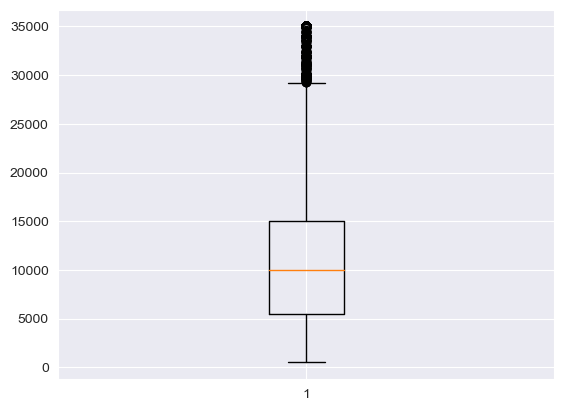

In [437]:
loan1['loan_amnt'].describe()        # loan amount boxplot
plt.boxplot(loan1['loan_amnt'])
plt.show()

##### Most of loan amount is 5000 to 15000

In [438]:
loan1['term'].value_counts() # loans are for 36 and 60 months.

 36 months    29096
 60 months    10621
Name: term, dtype: int64

In [439]:
loan1['home_ownership'].value_counts()/len(loan1['home_ownership'])*100 # house owners are less in number

RENT        47.584158
MORTGAGE    44.462069
OWN          7.699474
OTHER        0.246746
NONE         0.007553
Name: home_ownership, dtype: float64

In [440]:
plt.style.use('default')

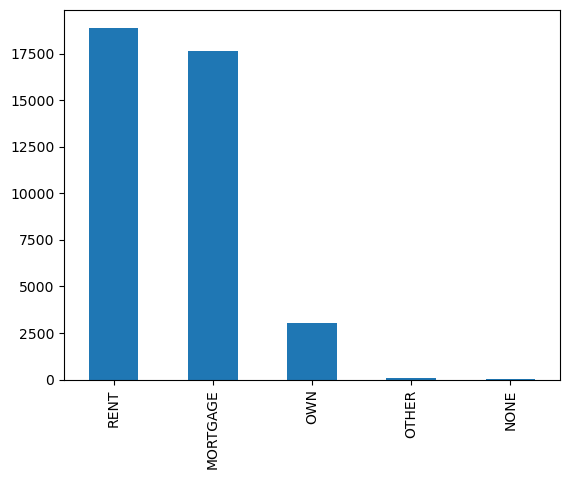

In [442]:
loan1['home_ownership'].value_counts().plot.bar()   # different home_ownership 
plt.show()

C:\Users\tpaul\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


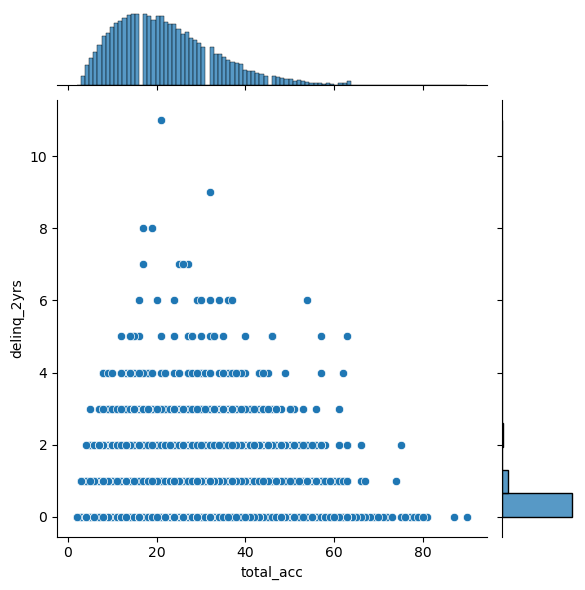

In [443]:
sns.jointplot(loan1.total_acc,loan1.delinq_2yrs)
plt.show()

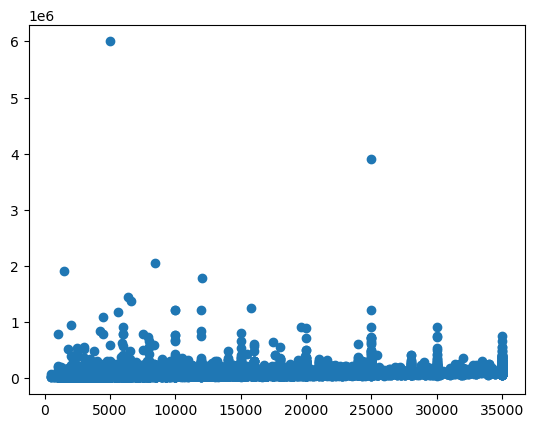

In [444]:
plt.scatter(loan1.loan_amnt,loan1.annual_inc)
plt.show()

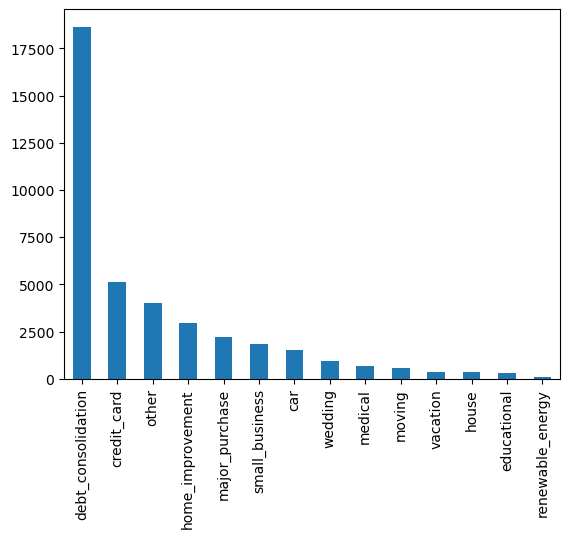

In [445]:
loan1['purpose'].value_counts().plot.bar()
plt.show()

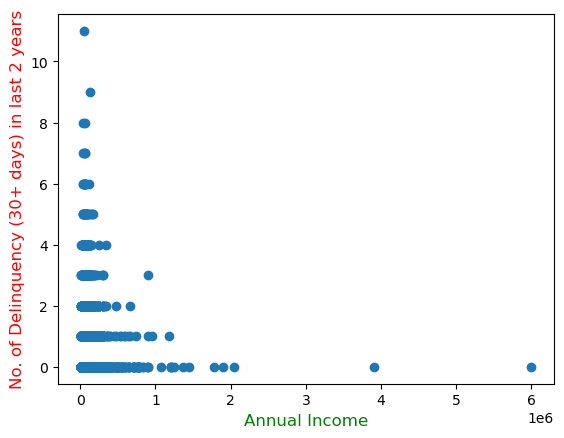

In [446]:
plt.scatter(loan1.annual_inc,loan1.delinq_2yrs)
plt.xlabel("Annual Income", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'g'})
plt.ylabel("No. of Delinquency (30+ days) in last 2 years", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'r'})
plt.show()

In [447]:
loan1.total_acc.value_counts()

16    1471
15    1462
17    1457
14    1445
20    1428
      ... 
74       1
77       1
78       1
87       1
90       1
Name: total_acc, Length: 82, dtype: int64

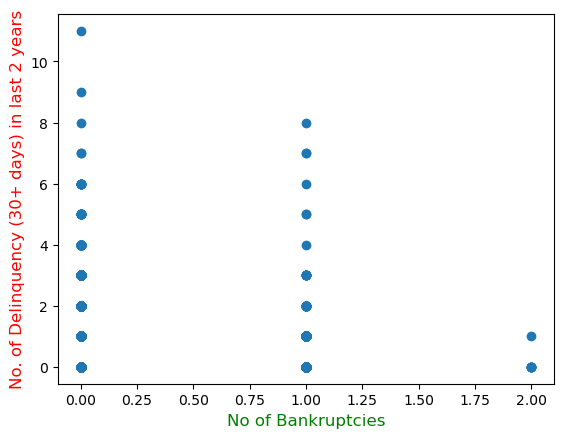

In [448]:
plt.scatter(loan1.pub_rec_bankruptcies,loan1.delinq_2yrs)
plt.xlabel("No of Bankruptcies", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'g'})
plt.ylabel("No. of Delinquency (30+ days) in last 2 years", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'r'})
plt.show()

In [449]:
loan1.dti

0        27.65
1         1.00
2         8.72
3        20.00
4        17.94
         ...  
39712    11.33
39713     6.40
39714     2.30
39715     3.72
39716    14.29
Name: dti, Length: 39717, dtype: float64

In [450]:
loan1['total_pymnt']-loan1['funded_amnt']

0         863.155187
1       -1491.290000
2         605.666844
3        2231.890000
4         513.330000
            ...     
39712     322.969293
39713    1413.491822
39714     272.161128
39715     174.198551
39716    1695.263334
Length: 39717, dtype: float64

In [451]:
loan1['total_pymnt_inv']-loan1['funded_amnt']

0         833.84
1       -1491.29
2         605.67
3        2231.89
4         513.33
          ...   
39712   -1286.12
39713   -7479.49
39714   -3602.88
39715   -4327.34
39716   -6519.17
Length: 39717, dtype: float64

In [452]:
loan1['total_rec_prncp']

0         5000.00
1          456.46
2         2400.00
3        10000.00
4         2475.94
           ...   
39712     2500.00
39713     8500.00
39714     5000.00
39715     5000.00
39716     7500.00
Name: total_rec_prncp, Length: 39717, dtype: float64

In [453]:
loan1.total_rec_int

0         863.16
1         435.17
2         605.67
3        2214.92
4        1037.39
          ...   
39712     322.97
39713    1413.49
39714     272.16
39715     174.20
39716    1695.26
Name: total_rec_int, Length: 39717, dtype: float64

In [454]:
loan1.revol_bal

0        13648
1         1687
2         2956
3         5598
4        27783
         ...  
39712     7274
39713     8847
39714     9698
39715    85607
39716     4175
Name: revol_bal, Length: 39717, dtype: int64

In [455]:
loan1.loan_status      # Loan status checking

0         Fully Paid
1        Charged Off
2         Fully Paid
3         Fully Paid
4            Current
            ...     
39712     Fully Paid
39713     Fully Paid
39714     Fully Paid
39715     Fully Paid
39716     Fully Paid
Name: loan_status, Length: 39717, dtype: object

In [456]:
loan1.loan_status.value_counts()*100/39717

Fully Paid     82.961956
Charged Off    14.167737
Current         2.870307
Name: loan_status, dtype: float64

### Excluding the current loan_Status 

In [457]:
loan1=loan1[loan1['loan_status'] != 'Current']

In [458]:
# df for different loan status. 
loan_fp=loan1[loan1['loan_status'] == 'Fully Paid']
loan_ch=loan1[loan1['loan_status'] == 'Charged Off']
loan_cu=loan1[loan1['loan_status'] == 'Current']

In [459]:
loan_fp['emp_length'].value_counts()*100/len(loan_fp)

1.0     22.418816
10.0    21.720789
2.0     11.301973
3.0     10.491654
4.0      8.740516
5.0      8.303490
6.0      5.647951
7.0      4.394537
8.0      3.738998
9.0      3.241275
Name: emp_length, dtype: float64

In [460]:
loan_ch['emp_length'].value_counts()*100/len(loan_ch)

10.0    23.653812
1.0     23.511640
2.0     10.076417
3.0      9.863160
4.0      8.210414
5.0      8.139328
6.0      5.455838
7.0      4.673894
8.0      3.607606
9.0      2.807891
Name: emp_length, dtype: float64

In [462]:
loan_cu['emp_length'].value_counts()*100/len(loan_cu)

Series([], Name: emp_length, dtype: float64)

In [463]:
loan1.pub_rec_bankruptcies.value_counts()*100/len(loan1)

0.0    93.936802
1.0     4.243461
2.0     0.012961
Name: pub_rec_bankruptcies, dtype: float64

In [465]:
loan_fp['pub_rec_bankruptcies'].value_counts()*100/len(loan_fp) # fully paid loans on bamkrupcies

0.0    94.376328
1.0     3.857360
2.0     0.009105
Name: pub_rec_bankruptcies, dtype: float64

In [466]:
loan_ch['pub_rec_bankruptcies'].value_counts()*100/len(loan_ch)  #charged off on bankrupcies

0.0    91.363071
1.0     6.504354
2.0     0.035543
Name: pub_rec_bankruptcies, dtype: float64

### Loan Purpose for loan status

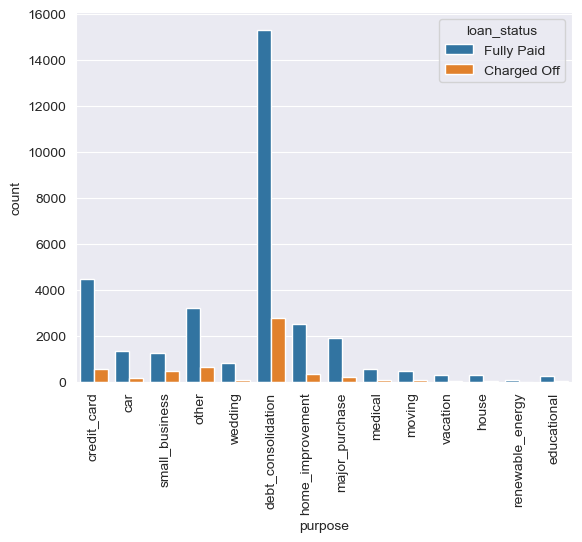

In [230]:
ax = sns.countplot(x="purpose", data=loan1,hue='loan_status')
plt.xticks(rotation=90)
plt.show()

In [232]:
loan_ch['dti'].mean()

14.00062377821221

In [233]:
loan1['emp_length'].mean()

4.925525572232159

In [234]:
loan_fp['emp_length'].median()

4.0

In [235]:
loan_ch['emp_length'].median()

4.0

In [236]:
loan1['title'].value_counts()

Debt Consolidation           2090
Debt Consolidation Loan      1620
Personal Loan                 641
Consolidation                 491
debt consolidation            478
                             ... 
Murray Loan                     1
Need debt consolidation!        1
freedom2                        1
DAVE WEDDING                    1
JAL Loan                        1
Name: title, Length: 19297, dtype: int64

In [237]:
loan_fp['title'].value_counts()*100/len(loan_fp)

Debt Consolidation         5.417299
Debt Consolidation Loan    4.084977
Personal Loan              1.650986
Consolidation              1.317147
debt consolidation         1.162367
                             ...   
moving loan 2011           0.003035
New Kitchen Floor          0.003035
Tony's CC consolidation    0.003035
Pay All                    0.003035
JAL Loan                   0.003035
Name: title, Length: 16861, dtype: float64

In [238]:
loan_ch['title'].value_counts()*100/len(loan_ch)

Debt Consolidation         5.420295
Debt Consolidation Loan    4.869380
Personal Loan              1.723832
Small Business Loan        1.688289
debt consolidation         1.688289
                             ...   
Ralph and Diana            0.017771
x1                         0.017771
Loanclub 2011              0.017771
desertrat                  0.017771
refinancing                0.017771
Name: title, Length: 3249, dtype: float64

In [239]:
loan1.verification_status.value_counts()

Not Verified       16694
Verified           12206
Source Verified     9677
Name: verification_status, dtype: int64

In [240]:
loan1.application_type.value_counts()

INDIVIDUAL    38577
Name: application_type, dtype: int64

### 1.Verification_status check for Full paid and charged off

In [241]:
loanfp=loan_fp['verification_status'].value_counts()*100/len(loan_fp)
loanfp

Not Verified       44.163885
Verified           30.819423
Source Verified    25.016692
Name: verification_status, dtype: float64

<AxesSubplot:>

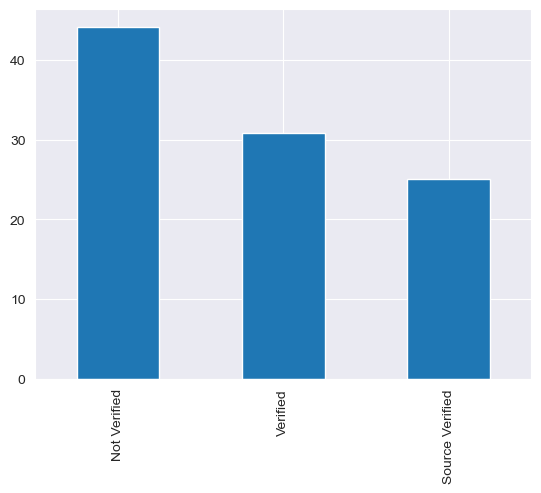

In [242]:
loanfp.plot.bar()

<AxesSubplot:>

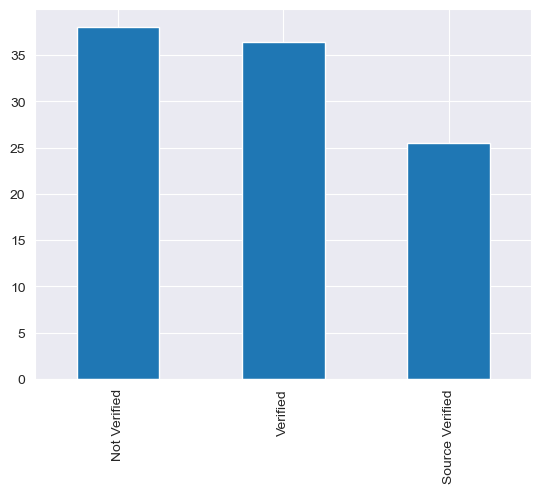

In [243]:
loanch.plot.bar()

In [244]:
loanch=loan_ch['verification_status'].value_counts()*100/len(loan_ch)
loanch

Not Verified       38.066465
Verified           36.449262
Source Verified    25.484272
Name: verification_status, dtype: float64

In [245]:
loan1.revol_bal.isnull().sum()

0

In [246]:
sns.countplot(('verification_status', data = loan_ch,hue='loan_status')

SyntaxError: invalid syntax (Temp/ipykernel_4816/3108220380.py, line 1)

### Loan Term & Grade Analysis

In [247]:
loan1.grade.value_counts()

B    11675
A    10045
C     7834
D     5085
E     2663
F      976
G      299
Name: grade, dtype: int64

In [248]:
fp=loan_fp['term'].value_counts()*100/len(loan1)
ch=loan_ch['term'].value_counts()*100/len(loan1)

Text(0, 0.5, '% among the all loans')

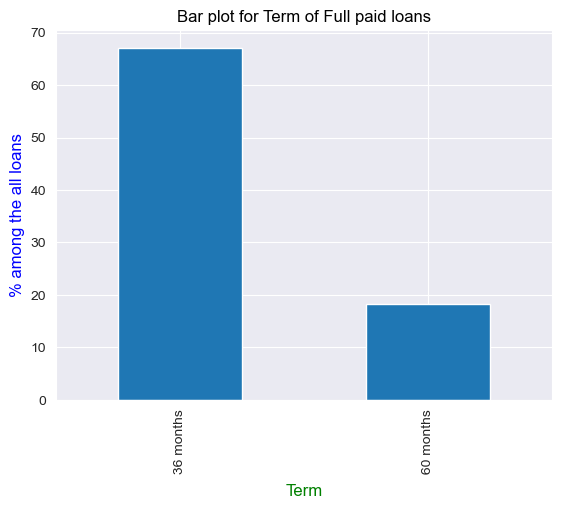

In [249]:
fp.plot.bar()
plt.title("Bar plot for Term of Full paid loans", color='black')
plt.xlabel("Term", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'green'})
plt.ylabel("% among the all loans", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'blue'})

Text(0, 0.5, '% among the all loans')

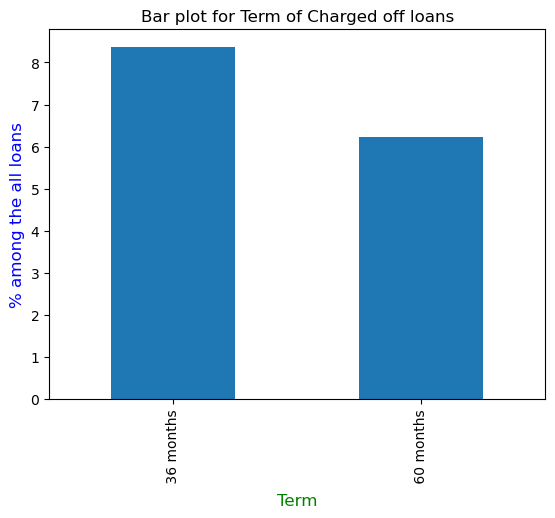

In [250]:
plt.style.use("default")
ch.plot.bar()
plt.title("Bar plot for Term of Charged off loans", color='black')
plt.xlabel("Term", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'green'})
plt.ylabel("% among the all loans", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'blue'})

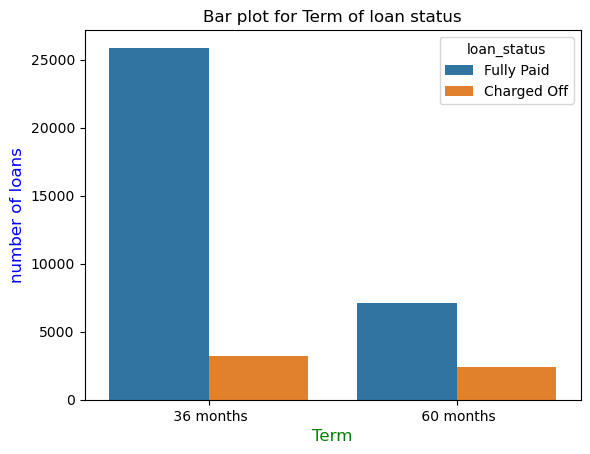

In [251]:
ax = sns.countplot(x="term", data=loan1,hue='loan_status')
#plt.xticks(rotation=90)
plt.title("Bar plot for Term of loan status", color='black')
plt.xlabel("Term", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'green'})
plt.ylabel("number of loans", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'blue'})
plt.show()


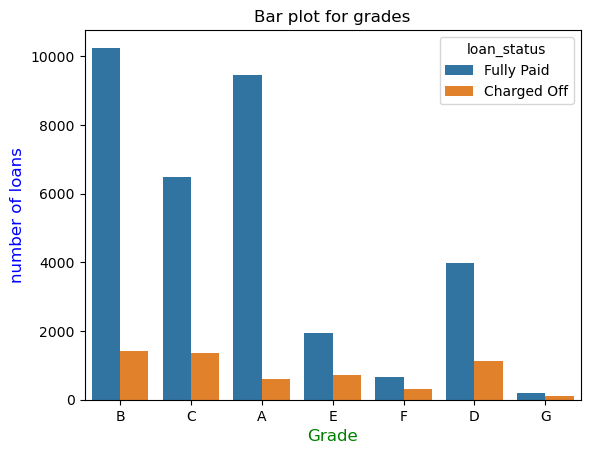

In [252]:
ax = sns.countplot(x="grade", data=loan1,hue='loan_status')
plt.title("Bar plot for grades", color='black')
plt.xlabel("Grade", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'green'})
plt.ylabel("number of loans", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'blue'})
plt.show()

In [253]:
loan_fp['grade'].value_counts()*100/len(loan_fp)

B    31.107739
A    28.658574
C    19.687405
D    12.039454
E     5.911988
F     1.993930
G     0.600910
Name: grade, dtype: float64

### Loan revol_bal Analysis over grade and loan status

In [254]:
loan_fp['revol_bal'].describe()

count     32950.000000
mean      13251.107739
std       15983.260153
min           0.000000
25%        3603.000000
50%        8682.500000
75%       16804.750000
max      149588.000000
Name: revol_bal, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x1ed3339f910>,
 'caps': [<matplotlib.lines.Line2D at 0x1ed333ac070>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ed3339f580>],
 'medians': [<matplotlib.lines.Line2D at 0x1ed333ac790>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ed333acb20>],
 'means': []}

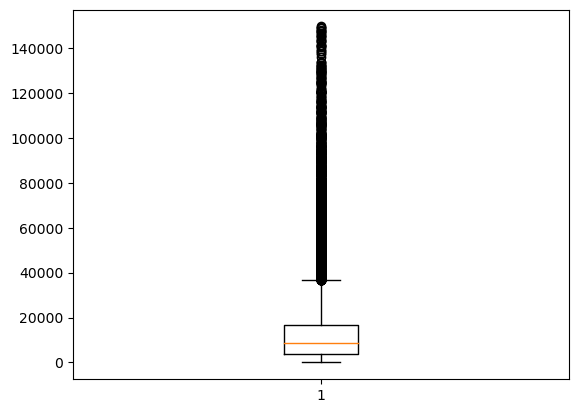

In [255]:
plt.boxplot(loan_fp['revol_bal'])

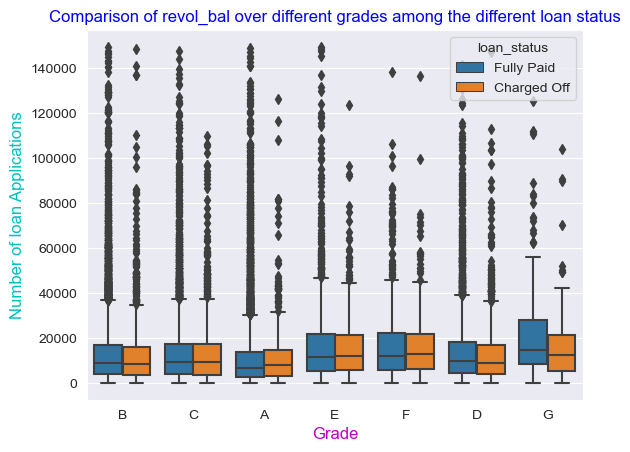

In [256]:
sns.set_style("darkgrid")
ax = sns.boxplot(x="grade", y="revol_bal", hue="loan_status",data=loan1)
plt.title("Comparison of revol_bal over different grades among the different loan status", color='blue')
plt.xlabel("Grade", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'm'})
plt.ylabel("Number of loan Applications", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'c'})
plt.show()

In [257]:
loan1.groupby(by=["loan_status","grade"]).revol_bal.mean().unstack()

grade,A,B,C,D,E,F,G
loan_status,,,,,,,
Charged Off,11762.662791,12716.248421,13356.634001,13130.446333,15421.629371,17082.166144,16791.792079
Fully Paid,11354.198877,13421.597268,13503.386465,14199.223847,16472.120123,17390.305936,22207.161616


In [258]:
loan_ch['grade'].value_counts()*100/len(loan_ch)

B    25.324329
C    23.938155
D    19.868491
E    12.706593
A    10.698418
F     5.669095
G     1.794917
Name: grade, dtype: float64

In [259]:
loan1.pivot_table(index=["grade","loan_status"], aggfunc="sum")

acc_now_delinq    annual_inc  chargeoff_within_12_mths  \
grade loan_status                                                           
A     Charged Off               0  3.161124e+07                       0.0   
      Fully Paid                0  6.382051e+08                       0.0   
B     Charged Off               0  8.498373e+07                       0.0   
      Fully Paid                0  7.037920e+08                       0.0   
C     Charged Off               0  7.899097e+07                       0.0   
      Fully Paid                0  4.516176e+08                       0.0   
D     Charged Off               0  6.971448e+07                       0.0   
      Fully Paid                0  2.775090e+08                       0.0   
E     Charged Off               0  5.238157e+07                       0.0   
      Fully Paid                0  1.547760e+08                       0.0   
F     Charged Off               0  2.563062e+07                       0.0   
      Fully Paid                0  5.584785e+07                       0.0   
G     Charged Off               0  7.965803e+06                       0.0   
      Fully Paid                0  2.022192e+07                       0.0   

                   collection_recovery_fee  collections_12_mths_ex_med  \
grade loan_status                                                        
A     Charged Off               30495.4706                         0.0   
      Fully Paid                    0.0000                         0.0   
B     Charged Off               80438.0731                         0.0   
      Fully Paid                    0.0000                         0.0   
C     Charged Off              126032.4089                         0.0   
      Fully Paid                    0.0000                         0.0   
D     Charged Off               99121.6572                         0.0   
      Fully Paid                    0.0000                         0.0   
E     Charged Off               80864.3082                         0.0   
      Fully Paid                    0.0000                         0.0   
F     Charged Off               58603.0003                         0.0   
      Fully Paid                    0.0000                         0.0   
G     Charged Off               17178.6278                         0.0   
      Fully Paid                    0.0000                         0.0   

                   delinq_2yrs  delinq_amnt        dti  emp_length  \
grade loan_status                                                    
A     Charged Off           41            0    8034.75      2899.0   
      Fully Paid           409            0  112959.75     47146.0   
B     Charged Off          154            0   19691.01      6913.0   
      Fully Paid          1214            0  136573.40     50223.0   
C     Charged Off          220            0   19436.50      6619.0   
      Fully Paid          1267            0   89086.15     30847.0   
D     Charged Off          240            0   15618.25      5650.0   
      Fully Paid          1025            0   55183.21     19327.0   
E     Charged Off          154            0   10136.26      3686.0   
      Fully Paid           480            0   27239.50      9954.0   
F     Charged Off          109            0    4470.68      1783.0   
      Fully Paid           218            0    9396.18      3325.0   
G     Charged Off           42            0    1394.06       521.0   
      Fully Paid            85            0    2802.29      1119.0   

                   funded_amnt  ...  pub_rec_bankruptcies     recoveries  \
grade loan_status               ...                                        
A     Charged Off      4590650  ...                   9.0  205612.095281   
      Fully Paid      79740800  ...                 119.0       0.000000   
B     Charged Off     15054300  ...                  71.0  705382.661585   
      Fully Paid     109722950  ...                 455.0       0.000000   
C     Charged Off     14

### HOME OWNERSHIP

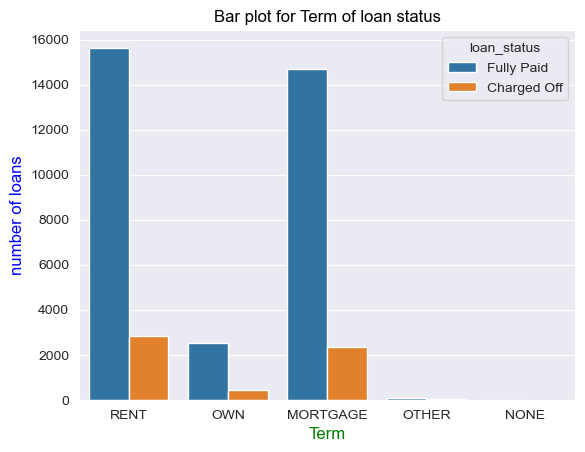

In [273]:
ax = sns.countplot(x="home_ownership", data=loan1,hue='loan_status')
#plt.xticks(rotation=90)
plt.title("Bar plot for Term of loan status", color='black')
plt.xlabel("Term", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'green'})
plt.ylabel("number of loans", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'blue'})
plt.show()

### Imp revol_bal on G

In [260]:
loan1.int_rate=loan1.int_rate.apply(lambda x: float(x))

C:\Users\tpaul\Anaconda3\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [261]:
loan1.pivot_table(index=["loan_status","grade"],values=["emp_length","dti","revol_bal","int_rate"], aggfunc="mean")

dti  emp_length   int_rate     revol_bal
loan_status grade                                                
Charged Off A      13.346761    4.815615   7.595997  11762.662791
            B      13.818253    4.851228  11.122295  12716.248421
            C      14.429473    4.913883  13.598656  13356.634001
            D      13.969812    5.053667  15.840474  13130.446333
            E      14.176587    5.155245  17.858336  15421.629371
            F      14.014671    5.589342  19.994545  17082.166144
            G      13.802574    5.158416  21.500000  16791.792079
Fully Paid  A      11.962274    4.992693   7.314083  11354.198877
            B      13.324234    4.899805  10.991862  13421.597268
            C      13.733028    4.755203  13.520049  13503.386465
            D      13.910565    4.871944  15.610781  14199.223847
            E      13.983316    5.109856  17.546689  16472.120123
            F      14.301644    5.060883  19.473044  17390.305936
            G      14.152980    5.651515  21.216566  22207.161616

C:\Users\tpaul\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='grade', ylabel='revol_bal'>

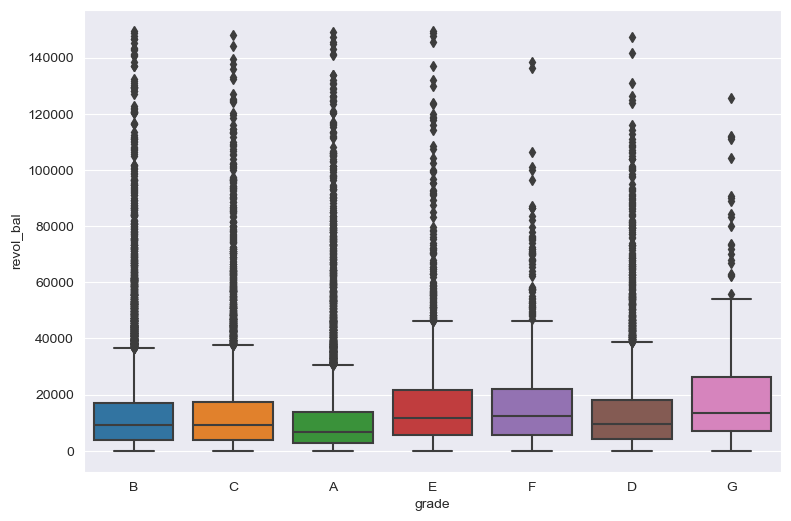

In [262]:
plt.figure(figsize=[9,6])
sns.boxplot( loan1['grade'],loan1['revol_bal'])

## Int_Rate & Funded amount Analysis 

C:\Users\tpaul\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


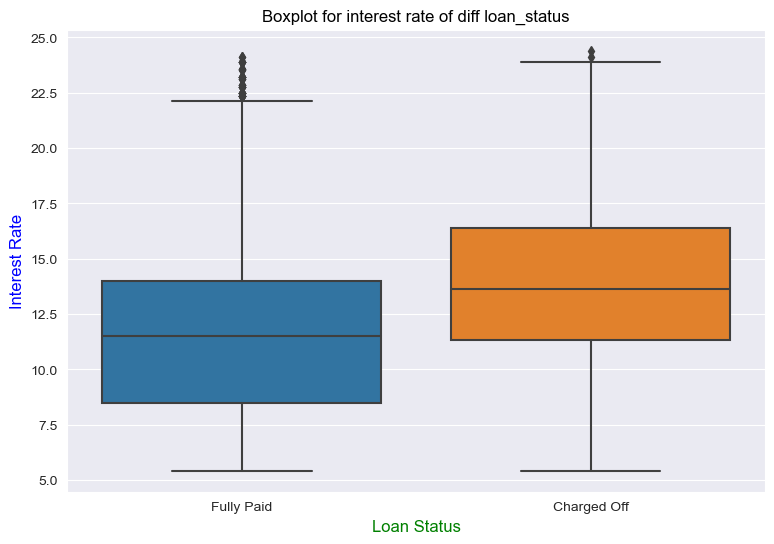

In [263]:
plt.figure(figsize=[9,6])
sns.boxplot( loan1['loan_status'],loan1['int_rate'])
plt.title("Boxplot for interest rate of diff loan_status", color='black')
plt.xlabel("Loan Status", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'green'})
plt.ylabel("Interest Rate", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'blue'})
plt.show()

C:\Users\tpaul\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


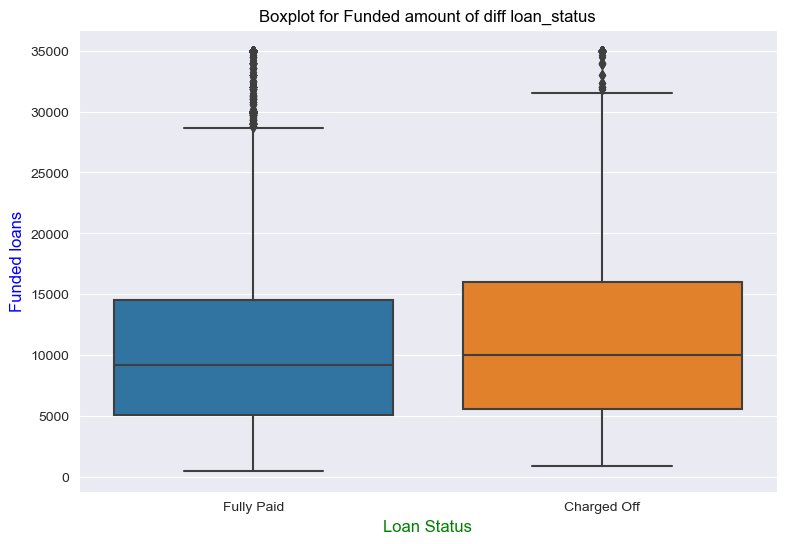

In [264]:
plt.figure(figsize=[9,6])
sns.boxplot( loan1['loan_status'],loan1['funded_amnt'])
plt.title("Boxplot for Funded amount of diff loan_status", color='black')
plt.xlabel("Loan Status", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'green'})
plt.ylabel("Funded loans", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'blue'})
plt.show()

<AxesSubplot:xlabel='loan_status', ylabel='funded_amnt'>

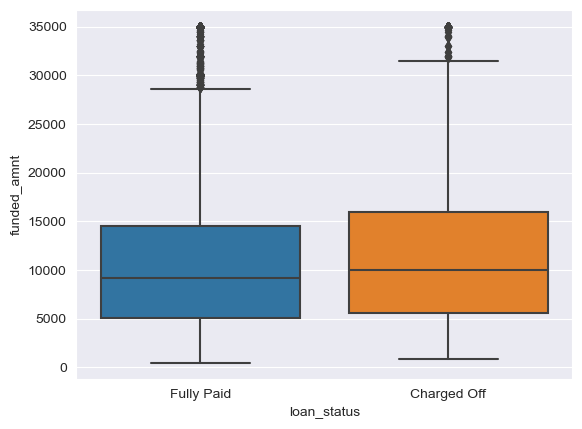

In [265]:
sns.boxplot(data=loan1,x='loan_status', y='funded_amnt')

### Payment status analysis over grade and loan status

In [266]:
loan1.pivot_table(index=["loan_status","grade"],values=['total_pymnt', 'total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries'], aggfunc="mean")

recoveries   total_pymnt  total_pymnt_inv  total_rec_int  \
loan_status grade                                                              
Charged Off A       341.548331   4362.957883      4184.585100     637.446744   
            B       495.005377   6026.093159      5606.588758    1450.418182   
            C       621.600211   6082.251622      5550.368330    1780.415791   
            D       667.976531   6948.044188      6437.168980    2407.841190   
            E       939.883893   9215.572900      8695.592154    3780.698685   
            F      1510.986423  11672.169557     10989.934671    5117.318903   
            G      1314.926535   9808.452079      9158.500396    4671.517822   
Fully Paid  A         0.000000   9294.723589      9019.897652     849.906565   
            B         0.000000  12502.696145     11902.616820    1797.317743   
            C         0.000000  12885.060476     12037.224080    2323.531218   
            D         0.000000  15053.812394     14284.377285    3109.658732   
            E         0.000000  19965.716113     18893.157603    4914.789651   
            F         0.000000  23475.178175     22388.066880    6534.434033   
            G         0.000000  29149.177869     27969.865909    8493.724141   

                   total_rec_late_fee  total_rec_prncp  
loan_status grade                                       
Charged Off A                3.065822      3380.897010  
            B                3.255408      4077.414168  
            C                4.611988      3675.623615  
            D                4.611331      3867.615098  
            E                4.827994      4490.162210  
            F                6.616717      5037.247367  
            G                7.269355      3814.738020  
Fully Paid  A                0.382083      8444.434953  
            B                0.704925     10704.673588  
            C                1.160202     10560.369215  
            D                1.290911     11942.863002  
            E                1.773973     15049.152531  
            F                1.570989     16939.173212  
            G                3.433535     20652.020253

In [269]:
loan1.pivot_table(index=["loan_status","verification_status"],values=['total_pymnt', 'total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries'], aggfunc="mean")

recoveries   total_pymnt  total_pymnt_inv  \
loan_status verification_status                                               
Charged Off Not Verified          433.467272   4878.850900      4242.729547   
            Source Verified       522.690257   5890.630913      5706.967448   
            Verified             1025.788644   9546.531813      9048.287835   
Fully Paid  Not Verified            0.000000   9615.757089      8846.625145   
            Source Verified         0.000000  11547.328020     11273.611532   
            Verified                0.000000  18138.985095     17460.828032   

                                 total_rec_int  total_rec_late_fee  \
loan_status verification_status                                      
Charged Off Not Verified           1281.138072            4.380800   
            Source Verified        1958.645279            3.732760   
            Verified               3313.177903            4.589419   
Fully Paid  Not Verified           1391.462682            0.932189   
            Source Verified        1901.355304            0.694031   
            Verified               3297.330558            0.921943   

                                 total_rec_prncp  
loan_status verification_status                   
Charged Off Not Verified             3159.864711  
            Source Verified          3405.562587  
            Verified                 5202.975792  
Fully Paid  Not Verified             8223.362341  
            Source Verified          9645.278769  
            Verified                14840.732686

In [270]:
loan1.groupby(by=["loan_status","verification_status"]).loan_status.count().unstack()

verification_status,Not Verified,Source Verified,Verified
loan_status,,,
Charged Off,2142,1434,2051
Fully Paid,14552,8243,10155


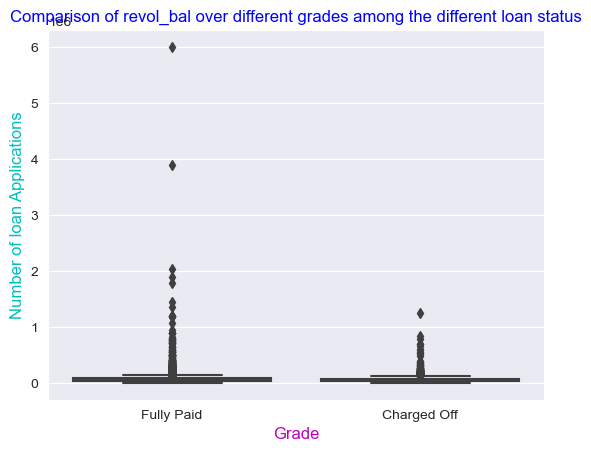

In [283]:
sns.boxplot(data=loan1,x='loan_status', y='annual_inc')
#ax = sns.boxplot(x="grade", y="loan_status",data=loan1)
plt.title("Comparison of revol_bal over different grades among the different loan status", color='blue')
plt.xlabel("Grade", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'm'})
plt.ylabel("Number of loan Applications", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'c'})
plt.show()

#### Annual income on Loan Status

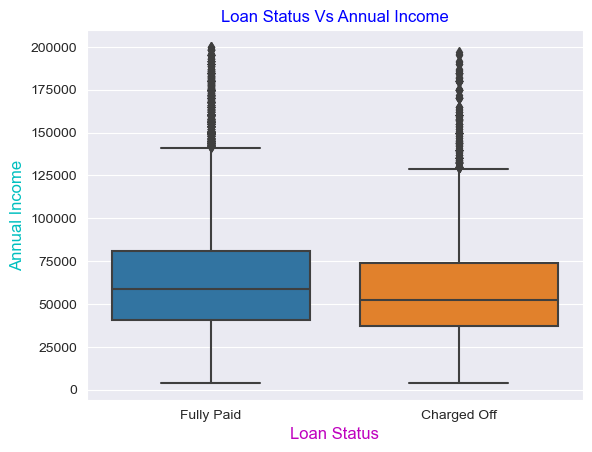

In [284]:
loan2=loan1[loan1['annual_inc']<0.2*1000000]    # removing the higher annual income 
sns.set_style("darkgrid")
sns.boxplot(data=loan2,x='loan_status', y='annual_inc')
#ax = sns.boxplot(x="grade", y="loan_status",data=loan1)
plt.title("Loan Status Vs Annual Income", color='blue')
plt.xlabel("Loan Status", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'm'})
plt.ylabel("Annual Income", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'c'})
plt.show()

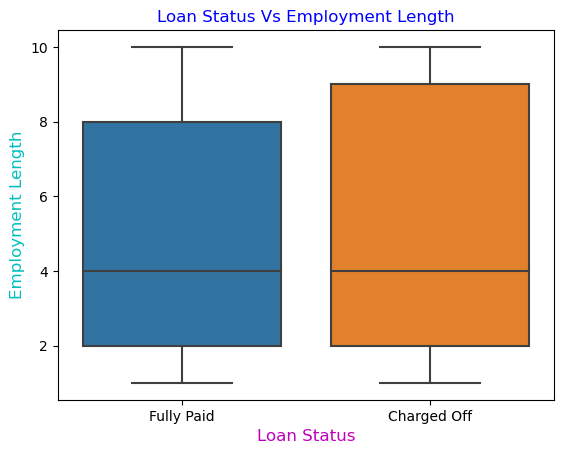

In [480]:
sns.boxplot(data=loan1,x='loan_status', y='emp_length')   # Employment Length Analysis
#ax = sns.boxplot(x="grade", y="loan_status",data=loan1)
plt.title("Loan Status Vs Employment Length", color='blue')
plt.xlabel("Loan Status", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'm'})
plt.ylabel("Employment Length", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'c'})
plt.show()

### Business point on Year basis

In [352]:
loan1["issue_d"]=pd.to_datetime(loan1["issue_d"],format='%b-%y')
loan1["Year"]=loan1["issue_d"].dt.year
loan1.Year

C:\Users\tpaul\AppData\Local\Temp/ipykernel_4816/3355891334.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan1["issue_d"]=pd.to_datetime(loan1["issue_d"],format='%b-%y')
C:\Users\tpaul\AppData\Local\Temp/ipykernel_4816/3355891334.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan1["Year"]=loan1["issue_d"].dt.year


0        2011
1        2011
2        2011
3        2011
5        2011
         ... 
39712    2007
39713    2007
39714    2007
39715    2007
39716    2007
Name: Year, Length: 38577, dtype: int64

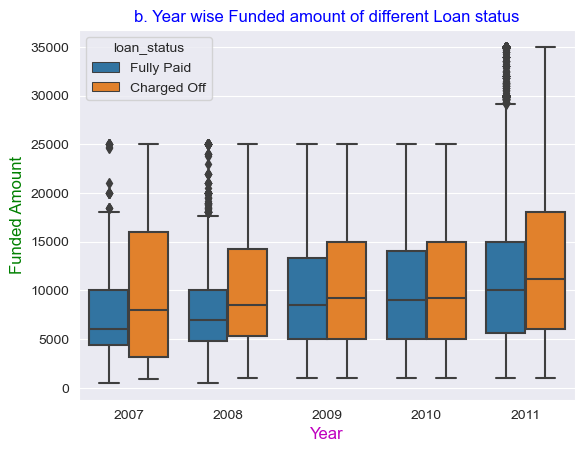

In [368]:
ax = sns.boxplot(x='Year',y="funded_amnt", data=loan1,hue='loan_status')
plt.title("b. Year wise Funded amount of different Loan status", color='blue')
plt.xlabel("Year", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'm'})
plt.ylabel("Funded Amount", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'g'})
plt.show()

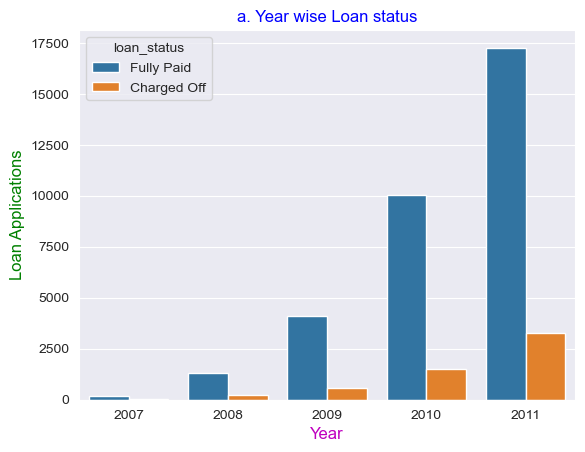

In [376]:
sns.set_style("darkgrid")

ax = sns.countplot(x='Year', data=loan1,hue='loan_status')
plt.title("a. Year wise Loan status", color='blue')
plt.xlabel("Year", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'm'})
plt.ylabel("Loan Applications", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'g'})
plt.show()


#### Business Purpose Vs Loan Status

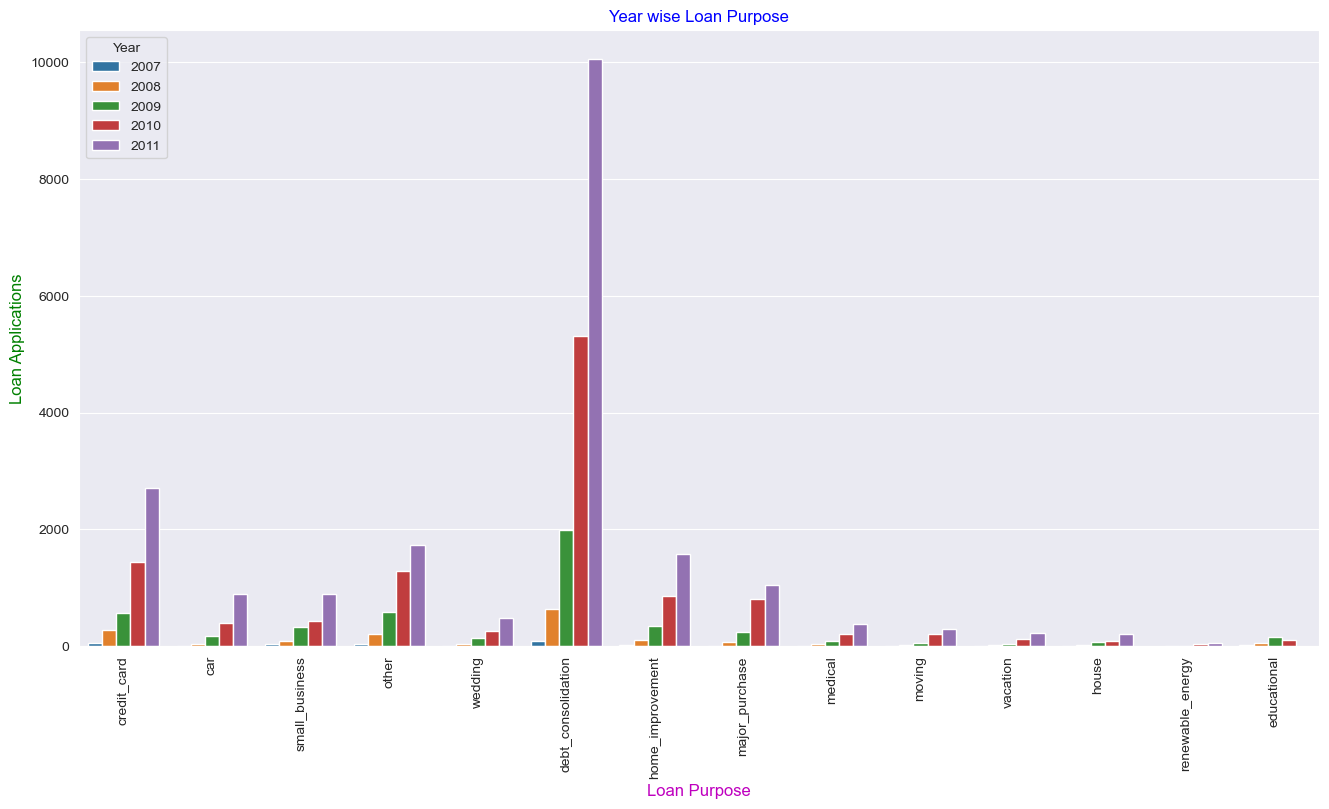

In [384]:
sns.set_style("darkgrid")
plt.figure(figsize=[16,8])
ax = sns.countplot(x='purpose', data=loan1,hue='Year')
plt.title("Year wise Loan Purpose", color='blue')
plt.xlabel("Loan Purpose", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'm'})
plt.ylabel("Loan Applications", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'g'})
plt.xticks(rotation=90)
plt.show()

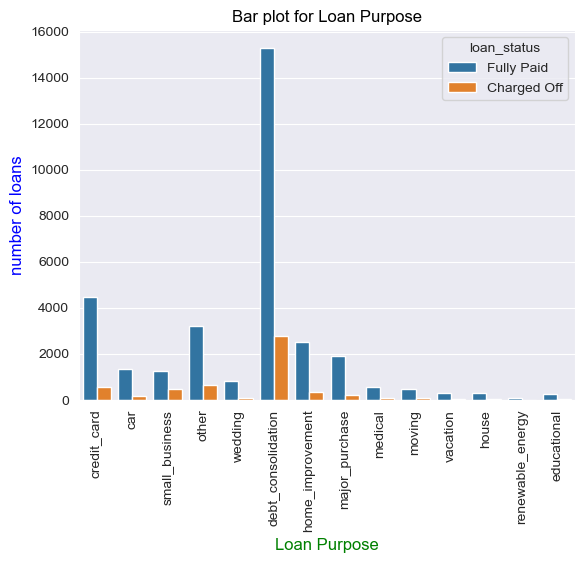

In [390]:
ax = sns.countplot(x="purpose", data=loan1,hue='loan_status')
plt.title("Bar plot for Loan Purpose", color='black')
plt.xlabel("Loan Purpose", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'green'})
plt.ylabel("number of loans", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'blue'})
plt.xticks(rotation=90)
plt.show()

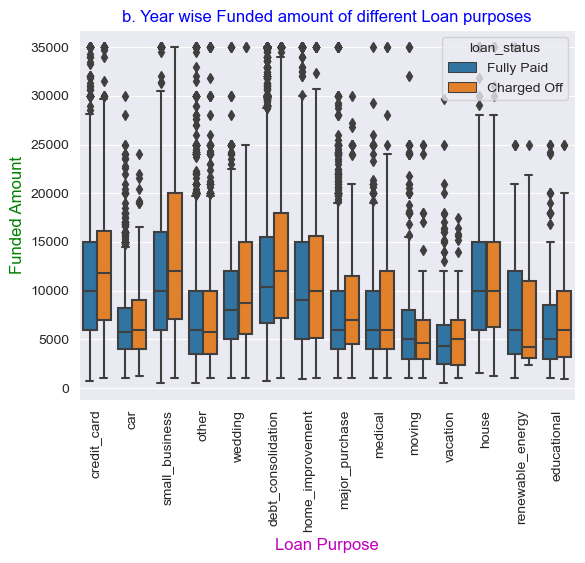

In [391]:
ax = sns.boxplot(x='purpose',y="funded_amnt", data=loan1,hue='loan_status')
plt.title("b. Year wise Funded amount of different Loan purposes", color='blue')
plt.xlabel("Loan Purpose", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'm'})
plt.ylabel("Funded Amount", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'g'})
plt.xticks(rotation=90)
plt.show()

 #### Bankruptcies Analysis

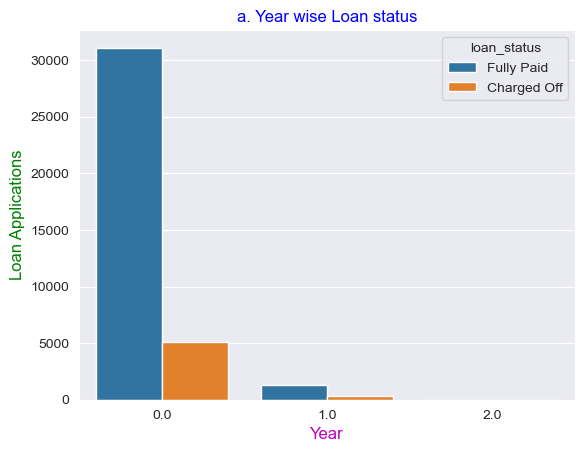

In [392]:

sns.set_style("darkgrid")

ax = sns.countplot(x='pub_rec_bankruptcies', data=loan1,hue='loan_status')
plt.title("a. Year wise Loan status", color='blue')
plt.xlabel("Year", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'm'})
plt.ylabel("Loan Applications", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'g'})
plt.show()


#### Home Ownership

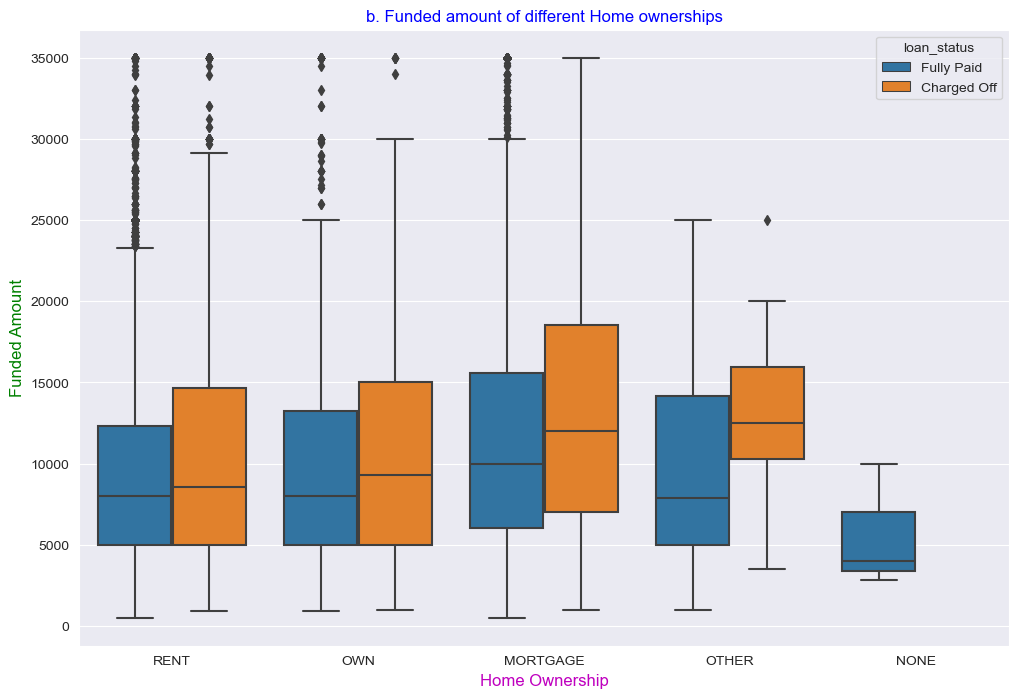

In [397]:
plt.figure(figsize=[12,8])
ax = sns.boxplot(x='home_ownership',y="funded_amnt", data=loan1,hue='loan_status')
plt.title("b. Funded amount of different Home ownerships", color='blue')
plt.xlabel("Home Ownership", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'm'})
plt.ylabel("Funded Amount", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'g'})
#plt.xticks(rotation=90)
plt.show()

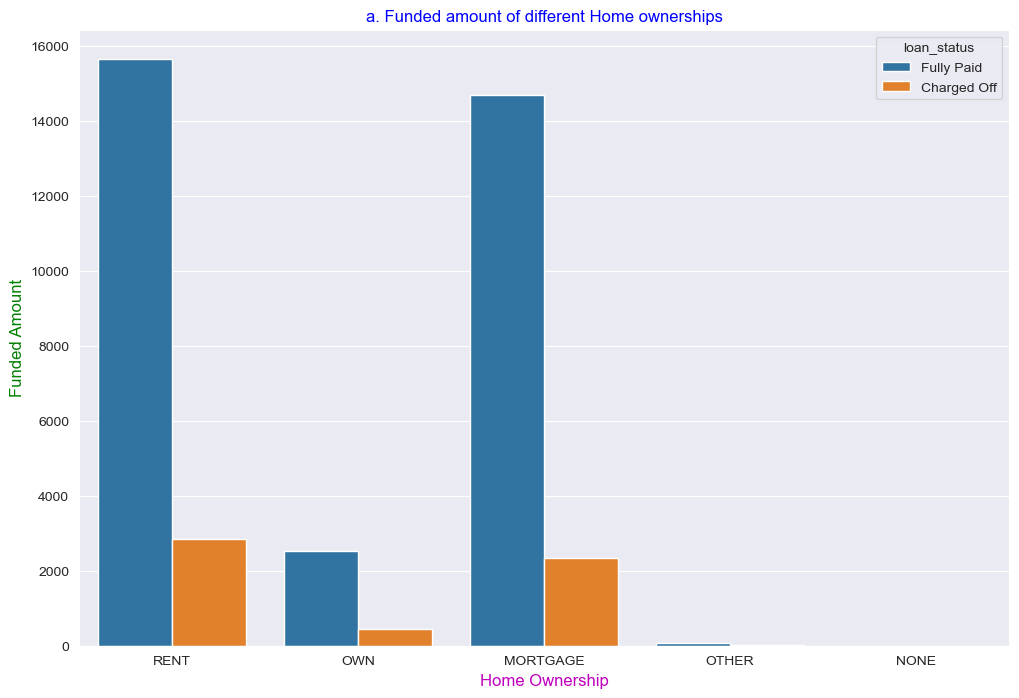

In [398]:
plt.figure(figsize=[12,8])
ax = sns.countplot(x='home_ownership', data=loan1,hue='loan_status')
plt.title("a. Funded amount of different Home ownerships", color='blue')
plt.xlabel("Home Ownership", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'm'})
plt.ylabel("Funded Amount", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'g'})
plt.show()

#### verification_status Analaysis

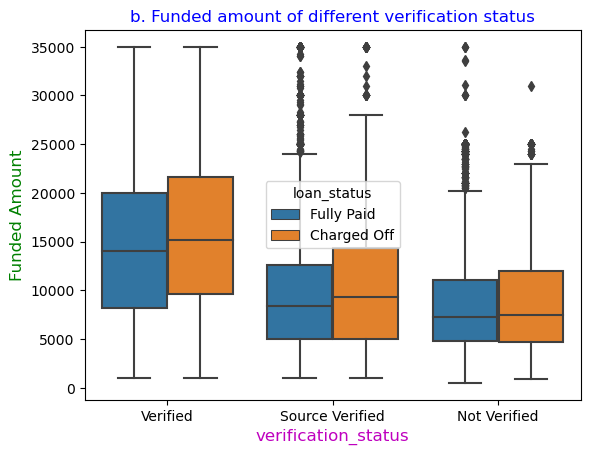

In [481]:
ax = sns.boxplot(x='verification_status',y="funded_amnt", data=loan1,hue='loan_status')
plt.title("b. Funded amount of different verification status", color='blue')
plt.xlabel("verification_status", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'm'})
plt.ylabel("Funded Amount", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'g'})
#plt.xticks(rotation=90)
plt.show()

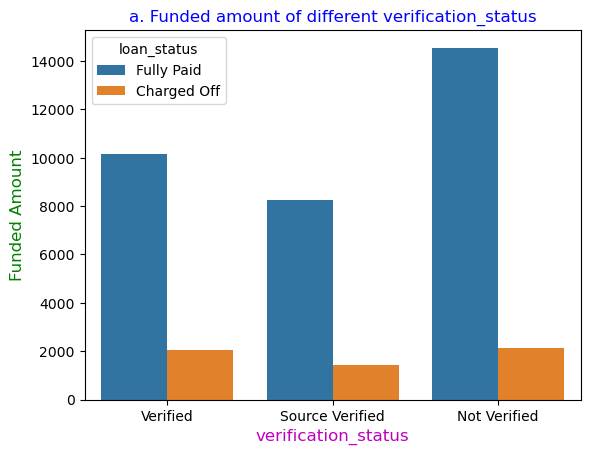

In [482]:

ax = sns.countplot(x='verification_status', data=loan1,hue='loan_status')
plt.title("a. Funded amount of different verification_status", color='blue')
plt.xlabel("verification_status", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'm'})
plt.ylabel("Funded Amount", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'g'})
plt.show()

In [469]:
loan1['delinq_2yrs']

0        0
1        0
2        0
3        0
5        0
        ..
39712    0
39713    1
39714    0
39715    0
39716    1
Name: delinq_2yrs, Length: 38577, dtype: int64